<a href="https://colab.research.google.com/github/nizarhaider/YOLOv5-Pytesseract-/blob/main/Roboflow_Custom_YOLOv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install Dependencies

_(Remember to choose GPU in Runtime if not already selected. Runtime --> Change Runtime Type --> Hardware accelerator --> GPU)_

In [1]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
!git reset --hard 886f1c03d839575afecb059accf74296fad395b6

Cloning into 'yolov5'...
remote: Enumerating objects: 9237, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 9237 (delta 13), reused 1 (delta 0), pack-reused 9205
Receiving objects: 100% (9237/9237), 9.74 MiB | 25.50 MiB/s, done.
Resolving deltas: 100% (6399/6399), done.
/content/yolov5
HEAD is now at 886f1c0 DDP after autoanchor reorder (#2421)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# install dependencies as necessary
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
from utils.google_utils import gdrive_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

     |████████████████████████████████| 636 kB 5.3 MB/s 
Setup complete. Using torch 1.9.0+cu102 _CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


# Download Correctly Formatted Custom Dataset 

We'll download our dataset from Roboflow. Use the "**YOLOv5 PyTorch**" export format. Note that the Ultralytics implementation calls for a YAML file defining where your training and test data is. The Roboflow export also writes this format for us.

To get your data into Roboflow, follow the [Getting Started Guide](https://blog.roboflow.ai/getting-started-with-roboflow/).



![YOLOv5 PyTorch export](https://i.imgur.com/5vr9G2u.png)


In [4]:
# Export code snippet and paste here
%cd /content
!curl -L "https://app.roboflow.com/ds/nnDrhH0fAs?key=MEltbdwnVC" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

/content
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   888  100   888    0     0    917      0 --:--:-- --:--:-- --:--:--   916
100 80.3M  100 80.3M    0     0  46.7M      0  0:00:01  0:00:01 --:--:-- 46.7M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/IMG_20210830_155825_jpg.rf.f1a80fa32823f2b4c2ac36a81acb7274.jpg  
 extracting: test/images/IMG_20210830_160422_jpg.rf.4651b69c1c982d855659b98d16a853c4.jpg  
 extracting: test/images/IMG_20210901_141137_jpg.rf.1376ba676e77d631f682e0d4ecdb918e.jpg  
 extracting: test/images/IMG_20210901_141241_jpg.rf.a9d2a76693c80771288722d9ec822a1a.jpg  
 extracting: test/images/IMG_20210902_155946_jpg.rf.9874f991da124be99d27c56ba4513dc0.jpg  
 extracting: test/images/IMG_20210902_

In [5]:
# when we ran this, we saw .007 second inference time. That is 140 FPS on a TESLA P100!
# use the best weights!
%cd /content/yolov5/
!python detect.py --weights /content/yolov5/weights/Pokka.pt --conf 0.4 --source ../test/images

/content/yolov5
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='../test/images', update=False, view_img=False, weights=['/content/yolov5/weights/Pokka.pt'])
YOLOv5 v4.0-126-g886f1c0 torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Model Summary: 232 layers, 7249215 parameters, 0 gradients, 16.8 GFLOPS
image 1/14 /content/yolov5/../test/images/IMG_20210830_155825_jpg.rf.f1a80fa32823f2b4c2ac36a81acb7274.jpg: bound

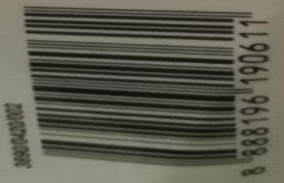

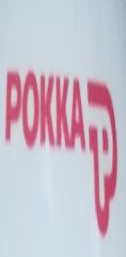

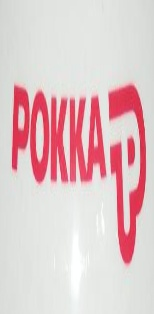

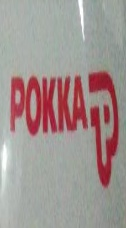

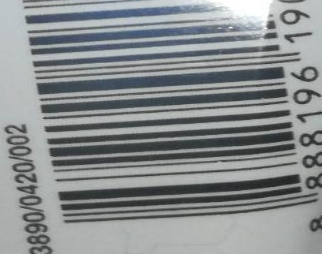

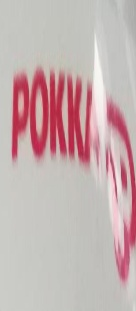

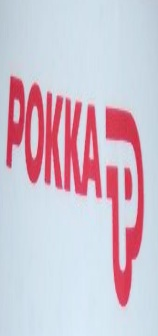

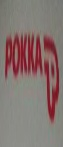

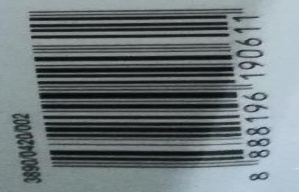

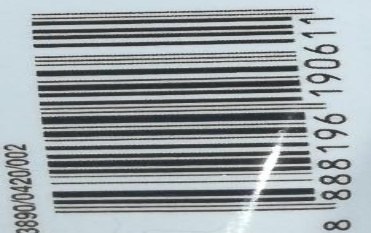

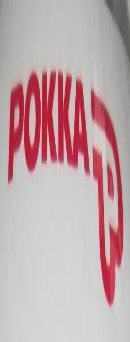

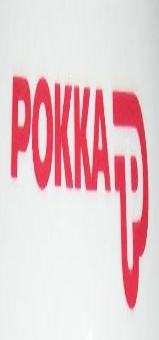

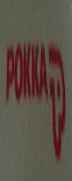

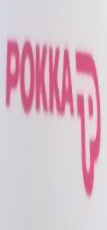

In [6]:
#display inference on ALL test images
#this looks much better with longer training above

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [7]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 40 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (3,841 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [9]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image
import matplotlib.pyplot as plt
import cv2

/content/yolov5/runs/detect/exp
 



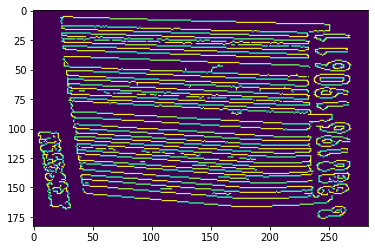

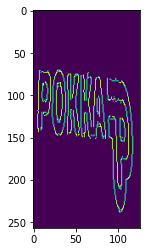

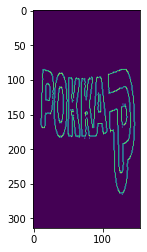

tl
a



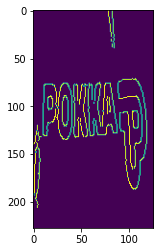

I

 

tee 0
; Q



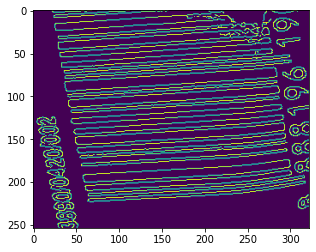

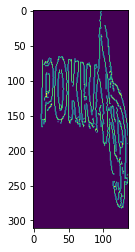

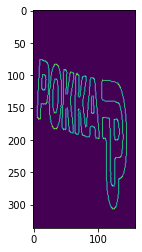

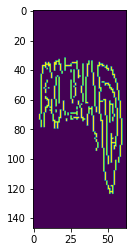

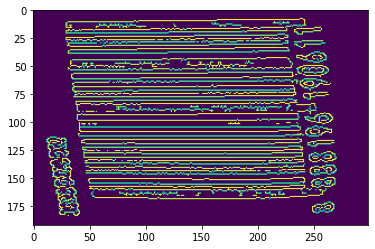

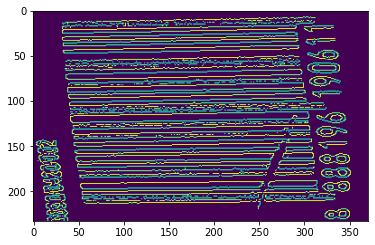

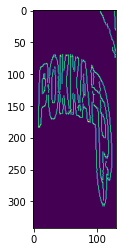

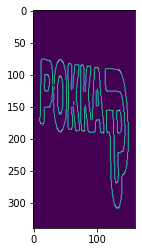

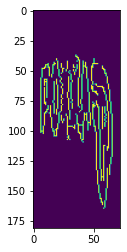

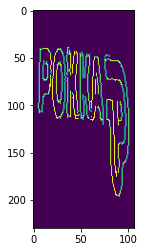

In [33]:
import numpy as np
%cd /content/yolov5/runs/detect/exp

for path in os.listdir('/content/yolov5/runs/detect/exp'):
  img1 = Image.open(path)

  img1 = np.uint8(img1) 
  img1 = cv2.cvtColor((img1), cv2.COLOR_BGR2GRAY)
  blur = cv2.medianBlur(img1, 3)
  edged = cv2.Canny(blur, 100, 10)
  # ret, thresh1 = cv2.threshold(edged, 200, 255, cv2.THRESH_BINARY)
  plt.imshow(edged)
  extract = pytesseract.image_to_string(Image.fromarray(edged))
  print(extract)
  plt.show()